In [7]:
from torchvision import datasets
data_path = r'C:\Users\yifun\Desktop\資管碩_訓練菜單\Pytorch\CH5_CH8'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # 產生訓練資料集物件（若此資料集未曾被下載至本機，TorchVision便會進行下載）
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # 當指定train=False，TorchVision會下載驗證資料集

Files already downloaded and verified
Files already downloaded and verified


In [8]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\yifun\Desktop\資管碩_訓練菜單\Pytorch\CH5_CH8
    Split: Train

In [9]:
cifar10_val

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: C:\Users\yifun\Desktop\資管碩_訓練菜單\Pytorch\CH5_CH8
    Split: Test

In [10]:
type(cifar10).__mro__ #編註：先用type()取得所屬類別，再用__mro__取得類別的繼承順序

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [11]:
len(cifar10)

50000

In [12]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck'] #建立一個class_names的字典（dictionary）
img, label = cifar10[99] #存取cifar10資料集中索引為99的項目
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

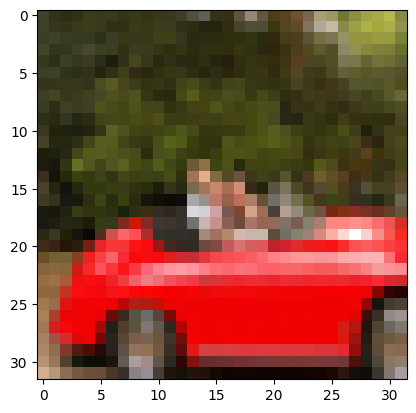

In [13]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [14]:
# 轉換資料集
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [ ]:
from torchvision import transforms
to_tensor = transforms.ToTensor() # 轉成張量
img_t = to_tensor(img)
img_t.shape #印出轉換出來的張量shape (C:channel、H:Height、W:Width)

torch.Size([3, 32, 32])

In [16]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.ToTensor())

In [17]:
img_t, _ = tensor_cifar10[99] #將tensor_cifar10中索引為99的項目存入img_t
type(img_t) #輸出img_t的資料類型

torch.Tensor

In [18]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [19]:
img_t.min(), img_t.max() #輸出img_t的最小值及最大值

(tensor(0.), tensor(1.))

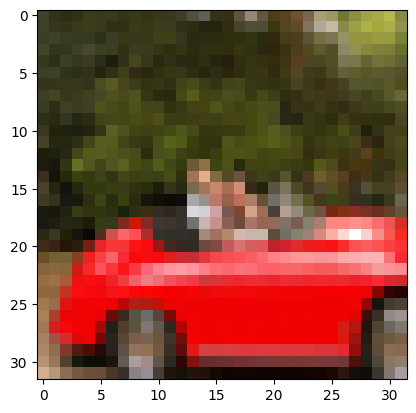

In [20]:
plt.imshow(img_t.permute(1, 2, 0))  #將張量的shape從C×H×W改為H×W×C，以符合PyTorch的規範
plt.show()

In [21]:
import torch
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [22]:
imgs.view(3, -1).mean(dim=1) 

tensor([0.4914, 0.4822, 0.4465])

In [23]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

## 額外補充（對驗證資料集做同樣的計算）

In [24]:
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False,
                          transform=transforms.ToTensor())

In [25]:
imgs_val = torch.stack([img_t for img_t, _ in tensor_cifar10_val], dim=3)
imgs_val.shape

torch.Size([3, 32, 32, 10000])

In [26]:
imgs_val.view(3, -1).mean(dim=1) 

tensor([0.4942, 0.4851, 0.4504])

In [27]:
imgs_val.view(3, -1).std(dim=1)

tensor([0.2467, 0.2429, 0.2616])

### 接續書中內容

In [28]:
transformed_cifar10 = datasets.CIFAR10( #對訓練資料集進行正規化
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), #各通道的平均值
                             (0.2470, 0.2435, 0.2616)) #各通道的標準差
    ]))

cifar10_val = datasets.CIFAR10( #對驗證資料集進行正規化
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), #編註：驗證集必須使用和訓練集相同的平均值及標準差來正規化
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


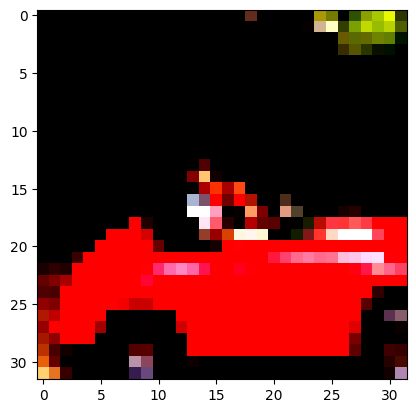

In [29]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()  # 某些RGB值會因為正規化而超出0.0~1.0範圍，進而改變整個通道的數值量級，Matplotlib會把超出範圍的pixel用黑色表示 

In [30]:
label_map = {0: 0, 2: 1} # 將飛機的類別標籤對應到0（原本為0）；將小鳥的類別標籤對應到1（原本為2）
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label])  # 取出原有訓練集中，飛機和小鳥照片
          for img, label in transformed_cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label]) # 取出原有驗證集中，飛機和小鳥照片
              for img, label in cifar10_val
              if label in [0, 2]]

In [31]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(
            nn.Linear(3072,  #輸入特徵數
                      512,   #隱藏層大小（輸出特徵數）
                      ),
            nn.Tanh(),
            nn.Linear(512,   #上一層的隱藏層大小（輸入特徵數）
                      n_out, #輸出特徵數（類別數量）
                      )
        )

In [32]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum() #編註：使用exp()可將輸入元素指數化

In [33]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [34]:
softmax(x).sum()

tensor(1.)

In [35]:
softmax = nn.Softmax(dim=1) #將softmax函數套用在第1軸（沿著同一列的不同行）
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

### 小編補充

In [36]:
softmax = nn.Softmax(dim=0) #將softmax函數套用在第0軸
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.5000, 0.5000, 0.5000],
        [0.5000, 0.5000, 0.5000]])

In [37]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


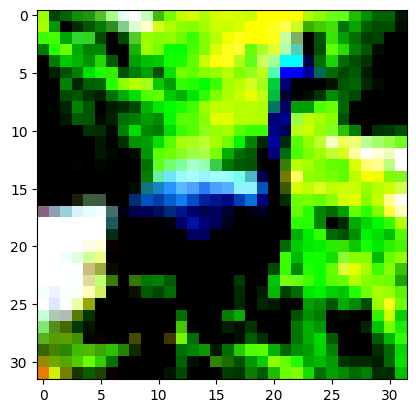

In [38]:
img, _ = cifar2[0] #取出cifar2中索引為0的圖片
plt.imshow(img.permute(1,2,0))
plt.show()

In [39]:
img_batch = img.view(-1).unsqueeze(0)

In [40]:
out = model(img_batch)
out

tensor([[0.5451, 0.4549]], grad_fn=<SoftmaxBackward0>)

In [41]:
_, index = torch.max(out, dim=1)
index

tensor([0])

In [42]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))

In [43]:
loss = nn.NLLLoss()

In [44]:
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.8547, grad_fn=<NllLossBackward0>)

In [45]:
import torch
import torch.nn as nn
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) #每個迴圈結束後，將損失列印出來


Epoch: 0, Loss: 5.019070
Epoch: 1, Loss: 6.620277
Epoch: 2, Loss: 8.142178
Epoch: 3, Loss: 3.755811
Epoch: 4, Loss: 14.023635
Epoch: 5, Loss: 5.490617
Epoch: 6, Loss: 14.085362
Epoch: 7, Loss: 2.143678
Epoch: 8, Loss: 10.146567
Epoch: 9, Loss: 4.481528
Epoch: 10, Loss: 6.235968
Epoch: 11, Loss: 9.066131
Epoch: 12, Loss: 9.102757
Epoch: 13, Loss: 3.478018
Epoch: 14, Loss: 2.976521
Epoch: 15, Loss: 4.626040
Epoch: 16, Loss: 12.112199
Epoch: 17, Loss: 3.533530
Epoch: 18, Loss: 9.357252
Epoch: 19, Loss: 9.836843
Epoch: 20, Loss: 5.434488
Epoch: 21, Loss: 9.749340
Epoch: 22, Loss: 7.808353
Epoch: 23, Loss: 3.024131
Epoch: 24, Loss: 12.800899
Epoch: 25, Loss: 8.378663
Epoch: 26, Loss: 16.585278
Epoch: 27, Loss: 7.832919
Epoch: 28, Loss: 9.533617
Epoch: 29, Loss: 0.004284
Epoch: 30, Loss: 4.591874
Epoch: 31, Loss: 4.010969
Epoch: 32, Loss: 0.163008
Epoch: 33, Loss: 9.309222
Epoch: 34, Loss: 7.988622
Epoch: 35, Loss: 8.273394
Epoch: 36, Loss: 9.316671
Epoch: 37, Loss: 14.293026
Epoch: 38, Loss

KeyboardInterrupt: 

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    #train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)    
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) #會列印隨機批次的損失值，在第8章中我們會對其進行改良                                                                                                                                             

Epoch: 0, Loss: 0.353659
Epoch: 1, Loss: 0.322632
Epoch: 2, Loss: 0.205321
Epoch: 3, Loss: 0.312343
Epoch: 4, Loss: 0.325948
Epoch: 5, Loss: 0.500466
Epoch: 6, Loss: 0.343738
Epoch: 7, Loss: 0.302689
Epoch: 8, Loss: 0.790939
Epoch: 9, Loss: 0.234327
Epoch: 10, Loss: 0.349185
Epoch: 11, Loss: 0.427032
Epoch: 12, Loss: 0.309133
Epoch: 13, Loss: 0.346126
Epoch: 14, Loss: 0.427708
Epoch: 15, Loss: 0.281359
Epoch: 16, Loss: 0.455504
Epoch: 17, Loss: 0.303824
Epoch: 18, Loss: 0.244872
Epoch: 19, Loss: 0.316976
Epoch: 20, Loss: 0.204281
Epoch: 21, Loss: 0.223607
Epoch: 22, Loss: 0.308675
Epoch: 23, Loss: 0.191201
Epoch: 24, Loss: 0.273031
Epoch: 25, Loss: 0.216673
Epoch: 26, Loss: 0.317815
Epoch: 27, Loss: 0.172556
Epoch: 28, Loss: 0.069955
Epoch: 29, Loss: 0.241099
Epoch: 30, Loss: 0.093350
Epoch: 31, Loss: 0.138967
Epoch: 32, Loss: 0.170986
Epoch: 33, Loss: 0.198168
Epoch: 34, Loss: 0.241753
Epoch: 35, Loss: 0.254500
Epoch: 36, Loss: 0.221324
Epoch: 37, Loss: 0.080410
Epoch: 38, Loss: 0.086

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct / total))

Accuracy: 0.800500


In [ ]:
logsoftmax_model = nn.Sequential(nn.Linear(3072, 1024),
                                 nn.Tanh(),
                                 nn.Linear(1024, 512),
                                 nn.Tanh(),
                                 nn.Linear(512, 128),
                                 nn.Tanh(),
                                 nn.Linear(128, 2),
                                 nn.LogSoftmax(dim=1))            

In [ ]:
new_model = nn.Sequential(nn.Linear(3072, 1024),
                          nn.Tanh(),
                          nn.Linear(1024, 512),
                          nn.Tanh(),
                          nn.Linear(512, 128),
                          nn.Tanh(),
                          nn.Linear(128, 2))            

loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-2
optimizer = optim.SGD(new_model.parameters(), lr=learning_rate)

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True) 
for epoch in range(n_epochs):    
    for imgs, labels in train_loader:
        outputs = new_model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) #由於資料經過洗牌，此行程式碼會列印隨機批次的損失值 — 在第8章中我們會對其進行改良

Epoch: 0, Loss: 0.530352
Epoch: 1, Loss: 0.830394
Epoch: 2, Loss: 0.474451
Epoch: 3, Loss: 0.447322
Epoch: 4, Loss: 0.177572
Epoch: 5, Loss: 0.418154
Epoch: 6, Loss: 0.434937
Epoch: 7, Loss: 0.380010
Epoch: 8, Loss: 0.733828
Epoch: 9, Loss: 0.471209
Epoch: 10, Loss: 0.540969
Epoch: 11, Loss: 0.279584
Epoch: 12, Loss: 0.354741
Epoch: 13, Loss: 0.296480
Epoch: 14, Loss: 0.282056
Epoch: 15, Loss: 0.352540
Epoch: 16, Loss: 0.225129
Epoch: 17, Loss: 0.441133
Epoch: 18, Loss: 0.545527
Epoch: 19, Loss: 0.437196
Epoch: 20, Loss: 0.196957
Epoch: 21, Loss: 0.182871
Epoch: 22, Loss: 0.634341
Epoch: 23, Loss: 0.462622
Epoch: 24, Loss: 0.108196
Epoch: 25, Loss: 0.403853
Epoch: 26, Loss: 0.116971
Epoch: 27, Loss: 0.478998
Epoch: 28, Loss: 0.163052
Epoch: 29, Loss: 0.098198
Epoch: 30, Loss: 0.111812
Epoch: 31, Loss: 0.069506
Epoch: 32, Loss: 0.092506
Epoch: 33, Loss: 0.116838
Epoch: 34, Loss: 0.166452
Epoch: 35, Loss: 0.055567
Epoch: 36, Loss: 0.168739
Epoch: 37, Loss: 0.042277
Epoch: 38, Loss: 0.158

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        #batch_size = imgs.shape[0]
        outputs = new_model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct / total))

Accuracy: 0.800500


In [ ]:
numel_list = [p.numel()
              for p in new_model.parameters()
              if p.requires_grad == True] #只計算可訓練參數的數量
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(393602, [393216, 128, 256, 2])

In [ ]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape #輸出weight張量及bias張量的shape

(torch.Size([1024, 3072]), torch.Size([1024]))